In [57]:
from math import pi

class BipolarCircuit(object):
    def __add__(self, other):
        if isinstance(other, BipolarCircuit):
            return Serial(self, other)
        return NotImplemented
    
    def __or__(self, other):
        if isinstance(other, BipolarCircuit):
            return Parallel(self, other)
        return NotImplemented        
    
    
    def impedance(self, freq):
        raise Exception('The impedance method shoulb implemented for the class {self.__class__.__name___}')

class Combination(BipolarCircuit):
    def __init__(self, *args):
        for item in args:
            assert isinstance(item, BipolarCircuit)
        self.args = args

    def __repr__(self):
        all_circuits = ', '.join([repr(circ) for circ in self.args])
        return f'{self.__class__.__name__}({all_circuits})'        
        
class Serial(Combination):        
    def impedance(self, freq):
        all_child_impedance = [item.impedance(freq) for item in self.args]
        return sum(all_child_impedance)
    
class Parallel(Combination):
    def impedance(self, freq):
        all_child_admittance = [1/item.impedance(freq) for item in self.args]
        return 1/sum(all_child_admittance)

class Device(BipolarCircuit):
    def __init__(self, value):
        self.value = value

    def __repr__(self):
        return f'{self.__class__.__name__}({self.value})'

        
class Resistor(Device):
    def impedance(self, freq):
        return self.value
    
class Capacitor(Device):
    def impedance(self, freq):
        return 1/(1J*2*pi*freq*self.value)

class Inductor(Device):        
    def impedance(self, freq):
        return (1J*2*pi*freq*self.value)
    
# idem for capacitor and inductor

In [58]:
# Create the Resistor class
# Then the Capacitor and Inductor
# This should work

R1 = Resistor(10)
R1 # => Resistor(10)

Resistor(10)

In [59]:
C1 = Capacitor(10E-6)
C1

Capacitor(1e-05)

In [62]:
my_circuit = Serial(Parallel(Resistor(10),Capacitor(1E-5),Inductor(15E-6)),
                Resistor(5))
my_circuit = (Resistor(10)|Capacitor(1E-5)|Inductor(15E-6))+Resistor(5)

my_circuit

Serial(Parallel(Parallel(Resistor(10), Capacitor(1e-05)), Inductor(1.5e-05)), Resistor(5))

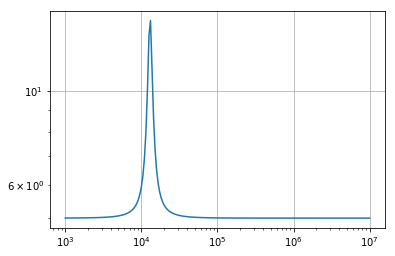

In [61]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import figure

fig = figure()
ax = fig.subplots(1, 1)


Tfreq = np.logspace(3, 7, 201)
ax.loglog(Tfreq, np.abs(my_circuit.impedance(Tfreq)))
ax.grid()

In [33]:
my_circuit = Serial(Parallel(Resistor(10),Capacitor(1E-5),Inductor(15E-6)),
                Resistor(5))
#or    
my_circuit = (Resistor(10)|Capacitor(1E-5)|Inductor(15E-6))+Resistor(5)

Tfreq = logspace(3, 7)
plt.semilogx(Tfreq, np.abs(my_circuit.impedance(Tfreq)))

TypeError: unsupported operand type(s) for |: 'Resistor' and 'Capacitor'

In [18]:
def f(*args):
    print(args)
    
f(1, 3, 'Hello')

(1, 3, 'Hello')


In [19]:
tpl = (1, 5, 6)

def f(a, b, c):
    print(b)
    
f(*tpl)

5


In [35]:
condition = True
if condition is False:
    raise Exception('...')

AssertionError: 